### 데이터 불러오기

In [1]:
# KBO 2019시즌 타자 기록지 데이터
import pandas as pd
file  = 'D:/jupyternotebook/KBO_2019_player_gamestats.csv'
raw = pd.read_csv(file, encoding = 'cp949')

In [6]:
# 타자/게임별 기록이 저장 
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀       15311 non-null  object 
 1   이름      15311 non-null  object 
 2   생일      15311 non-null  object 
 3   일자      15311 non-null  object 
 4   상대      15311 non-null  object 
 5   결과      15311 non-null  object 
 6   타순      15311 non-null  int64  
 7   P       15311 non-null  object 
 8   선발      15311 non-null  int64  
 9   타수      15311 non-null  int64  
 10  득점      15311 non-null  int64  
 11  안타      15311 non-null  int64  
 12  2타      15311 non-null  int64  
 13  3타      15311 non-null  int64  
 14  홈런      15311 non-null  int64  
 15  루타      15311 non-null  int64  
 16  타점      15311 non-null  int64  
 17  도루      15311 non-null  int64  
 18  도실      15311 non-null  int64  
 19  볼넷      15311 non-null  int64  
 20  사구      15311 non-null  int64  
 21  고4      15311 non-null  int64  
 22

In [8]:
# 타자 데이터 분석에 활용할 컬럼만 선택
columns_select = ['팀', '이름', '생일','일자', '상대','타수','안타','홈런', '루타', '타점','볼넷', '사구', '희비']
data = raw[columns_select]
data.head()

,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0


## KBO 최고의 타자 

- 선수별 기록 집계하기

In [10]:
# 피벗테이블을 이용해, 선수별 주요 기록을 정리하겠습니다. 
data_player = data.pivot_table(index=["팀","이름","생일"], values=["타수","안타","홈런","루타","타점","볼넷","사구","희비"],
                aggfunc="sum")
data_player

루타  볼넷  사구   안타   타수  타점  홈런  희비
팀   이름  생일                                           
KIA 고영창 1989-02-24    0   0   0    0    0   0   0   0
    김선빈 1989-12-18  146  43   1  115  394  40   3   4
    김세현 1987-08-07    0   0   0    0    0   0   0   0
    김주찬 1981-03-25  126  17   5  101  337  32   3   3
    나지완 1985-05-19   47  19   3   24  129  17   6   2
...                 ...  ..  ..  ...  ...  ..  ..  ..
한화  최윤석 1987-03-28    3   3   0    3   12   1   0   0
    최재훈 1989-08-27  135  56  14  108  373  31   3   4
    최진행 1985-08-17   51   9   2   27  117  19   6   1
    하주석 1994-02-25    7   0   0    5   19   2   0   0
    호잉  1989-05-18  219  38   5  135  476  73  18   5

[285 rows x 8 columns]

<AxesSubplot:>

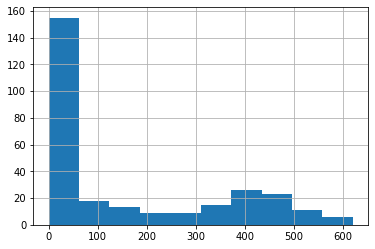

In [11]:
# 타수가 0인 데이터도 보이기 때문에, 타수가 적은 선수는 제외
# 어느 정도가 적은지 판단하기 위해, 타수 데이터의 분포를 살펴보기
data_player['타수'].hist()

In [12]:
# 타수가 50보다 큰 선수들만 선택 
cond = data_player['타수'] > 50
# 다중 인덱스 --> 컬럼으로 변경하기
data_player = data_player[cond].reset_index()    
data_player

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2
...,...,...,...,...,...,...,...,...,...,...,...
132,한화,정은원,2000-01-17,211,48,0,148,564,57,8,6
133,한화,지성준,1994-04-10,38,5,0,26,104,11,2,0
134,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4
135,한화,최진행,1985-08-17,51,9,2,27,117,19,6,1


In [13]:
# 데이터 프레임을 입력하면, 해당 데이터 프레임에서 인덱스별 실적을 계산하여 반환해주는 함수 

def cal_hit(df):
    '''
    - 타율 : 타격에 성공해서 진루하는 비율 --> 안타 / 타수
    - 출루율: 살아서 진루하는 비율 -->  (안타+볼넷+몸에맞는볼)/(타수+볼넷+몸에맞는볼+희생플라이)
    - 장타율 : 타율에 진루한 베이스 가중치 추가 -->   루타 / 타수
    '''
    
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['사구'] + df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS'] = df['출루율'] + df['장타율']
    return df

In [14]:
# data_player에 있는 선수별 실적을 이용해 타율, 출루율, 장타율, OPS를 계산 
player_stat = cal_hit(data_player)
player_stat

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.398496,0.370558,0.769055
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.356522,0.373887,0.730409
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.343284,0.364341,0.707625
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.331169,0.320000,0.651169
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.315686,0.317460,0.633147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,한화,정은원,2000-01-17,211,48,0,148,564,57,8,6,0.262411,0.343860,0.374113,0.717973
133,한화,지성준,1994-04-10,38,5,0,26,104,11,2,0,0.250000,0.298077,0.365385,0.663462
134,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.455243,0.361930,0.817173
135,한화,최진행,1985-08-17,51,9,2,27,117,19,6,1,0.230769,0.316667,0.435897,0.752564


In [93]:
# 출루율/장타율/OPS/타율 기준으로 KBO 최고 타자는 누구인지 성적순으로 정렬
# 출루율을 기준으로 정렬을 하며, 만약 동률일 경우 그다음 기준인 장타율을, 이후에는 OPS, 타율을 기준으로 정렬
# 상위 20명만 나오게 만듦
player_stat = player_stat.sort_values(by = ['출루율','장타율','OPS', '타율'], ascending = False)
player_stat = player_stat.reset_index(drop = True)
player_stat.head(20)

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,0,0.365591,0.500000,0.645161,1.145161
1,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,7,0.300439,0.487234,0.484649,0.971883
2,NC,양의지,1987-06-05,225,48,15,139,394,68,20,6,0.352792,0.486747,0.571066,1.057813
3,KT,강백호,1999-07-29,217,61,2,147,438,65,13,4,0.335616,0.472973,0.495434,0.968407
4,키움,박병호,1986-07-10,265,85,14,133,475,107,36,9,0.280000,0.465863,0.557895,1.023758
5,삼성,러프,1986-07-28,243,80,7,138,472,101,22,9,0.292373,0.461066,0.514831,0.975896
6,NC,박석민,1985-06-22,172,65,12,96,364,74,19,3,0.263736,0.456464,0.472527,0.928992
7,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.455243,0.361930,0.817173
8,키움,샌즈,1987-09-28,296,86,6,170,568,119,28,5,0.299296,0.452504,0.521127,0.973631
9,두산,김재호,1985-03-21,139,69,8,105,385,51,4,11,0.272727,0.450495,0.361039,0.811534


In [15]:
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되도록 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False   

<AxesSubplot:xlabel='팀', ylabel='출루율'>

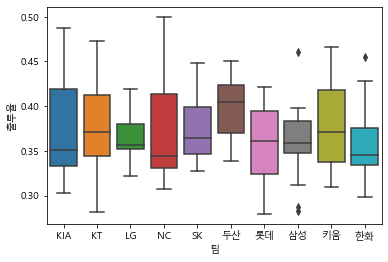

In [16]:
# 팀별 선수 출루율 분포 
sns.boxplot(data = player_stat, x = '팀', y = '출루율')

<AxesSubplot:xlabel='팀', ylabel='출루율'>

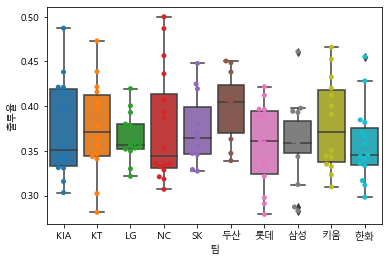

In [19]:
# 팀별 선수 출루율 분포 
# swarmplot -> 개수까지 확인 가능
sns.swarmplot(data = player_stat, x = '팀', y = '출루율')
sns.boxplot(data = player_stat, x = '팀', y = '출루율')       

<AxesSubplot:xlabel='팀', ylabel='출루율'>

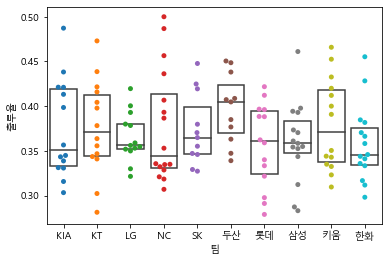

In [20]:
sns.swarmplot(data = player_stat, x = '팀', y = '출루율')
sns.boxplot(data = player_stat, x = '팀', y = '출루율',
            showcaps=False,             # 박스 상단 가로라인 보이지 않기
            whiskerprops={'linewidth':0}, # 박스 상단 세로 라인 보이지 않기 
            showfliers=False,           # 박스 범위 벗어난 아웃라이어 표시하지 않기
            boxprops={'facecolor':'None'}, # 박스 색상 지우기
           )

In [19]:
# 타자별 2019년 기록 데이터를 저장
file = './data/player_stat.csv'
player_stat.to_csv(file, encoding = 'cp949', index = False)